# Importing Libraries

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

# Importing data

In [135]:
train=pd.read_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\Individual\\Data Analysis Challenge\\train.csv')

train.shape

(205, 26)

In [136]:
train.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [137]:
TARGET_COL = 'price'

# Features and datatypes

In [138]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# Basic Stats of Categorial and Numerical Features

In [139]:
train.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.4,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


1. top = most frequent label
2. freq = frequency of  'top' label 

**Replacing ' ? '  with NaN values**

In [140]:
train = train.replace('?', np.NaN)

**Handling datatypes**

In [141]:
train['price']       = train['price'].astype('float')
train['bore']        = train['bore'].astype('float')
train['stroke']      = train['stroke'].astype('float')
train['horsepower']  = train['horsepower'].astype('float')
train['peak-rpm']    = train['peak-rpm'].astype('float')
train['normalized-losses']    = train['normalized-losses'].astype('float')

# % of NaN values 

In [142]:
100 * train.isnull().sum()/train.shape[0]

symboling             0.00000
normalized-losses    20.00000
make                  0.00000
fuel-type             0.00000
aspiration            0.00000
num-of-doors          0.97561
body-style            0.00000
drive-wheels          0.00000
engine-location       0.00000
wheel-base            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb-weight           0.00000
engine-type           0.00000
num-of-cylinders      0.00000
engine-size           0.00000
fuel-system           0.00000
bore                  1.95122
stroke                1.95122
compression-ratio     0.00000
horsepower            0.97561
peak-rpm              0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 1.95122
dtype: float64

**Visually**

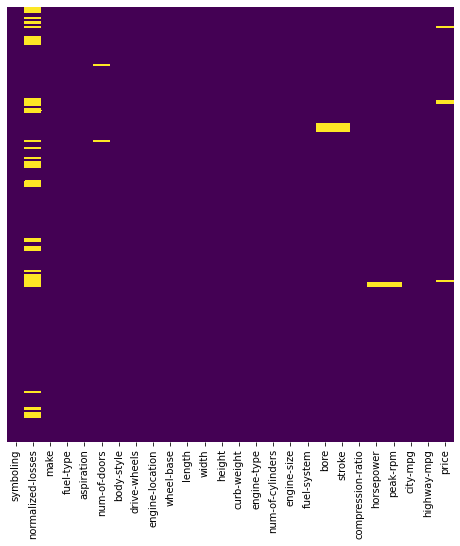

In [38]:
plt.figure(figsize=(8,8))
sns.heatmap(train.isnull(),cmap='viridis',cbar=False,yticklabels=False)

1. As evident **normalized-losses** has the most missing values
2. normalized-losses = **20 %** ; bore = **1.95 %** ;
stroke = **1.95 %** ; price = **1.95 %**

**Segregating Numerical and Categorical Features**

In [143]:
features = [c for c in train.columns if c not in [TARGET_COL]]
cat_cols = train.select_dtypes(include=['object'])

# categorical features
cat_cols = [c for c in features if c in cat_cols]

# numerical features
num_cols = [n for n in features if n not in cat_cols]

print('categorical variables')
display(cat_cols)
print('numerical variables')
display(num_cols)

categorical variables


['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

numerical variables


['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

# Distinct labels in Categorical Feature

In [40]:
train[cat_cols].nunique()

make                22
fuel-type            2
aspiration           2
num-of-doors         2
body-style           5
drive-wheels         3
engine-location      2
engine-type          7
num-of-cylinders     7
fuel-system          8
dtype: int64

# **Replacing  NaN**

1. Numerical with mean
2. Categorical with mode

In [144]:
for column in cat_cols:
    mode = train[column].mode()[0]
    train[column] = train[column].replace('unknown',mode)
    train[column] = train[column].replace('nan',mode)
    
for column in num_cols:
    mean = train[column].mean()
    train[column].fillna(mean,inplace = True)
    train[column] = train[column].replace('NaN',mean)

# Target (Price)  Distribution

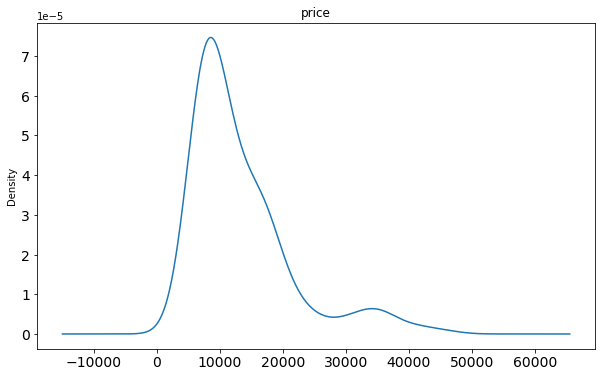

In [42]:
_ = train[TARGET_COL].plot(kind = 'density', title = 'price', fontsize=14, figsize=(10, 6))

As evident, the target (price) is **right skewed**. That means there are  lot of outliers

**Outliers using Boxplot**

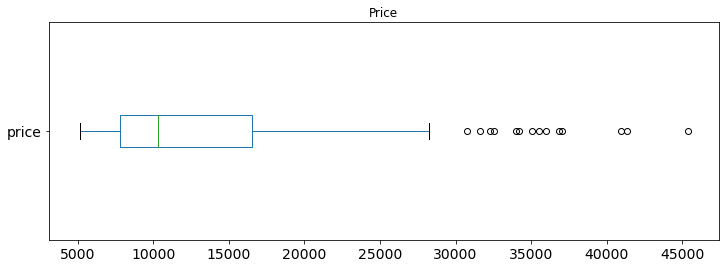

In [43]:
_ = train[TARGET_COL].plot(kind = 'box', vert=False, figsize=(12, 4), title = 'Price', fontsize=14)

# Univariate Analysis

**Numerical Features**

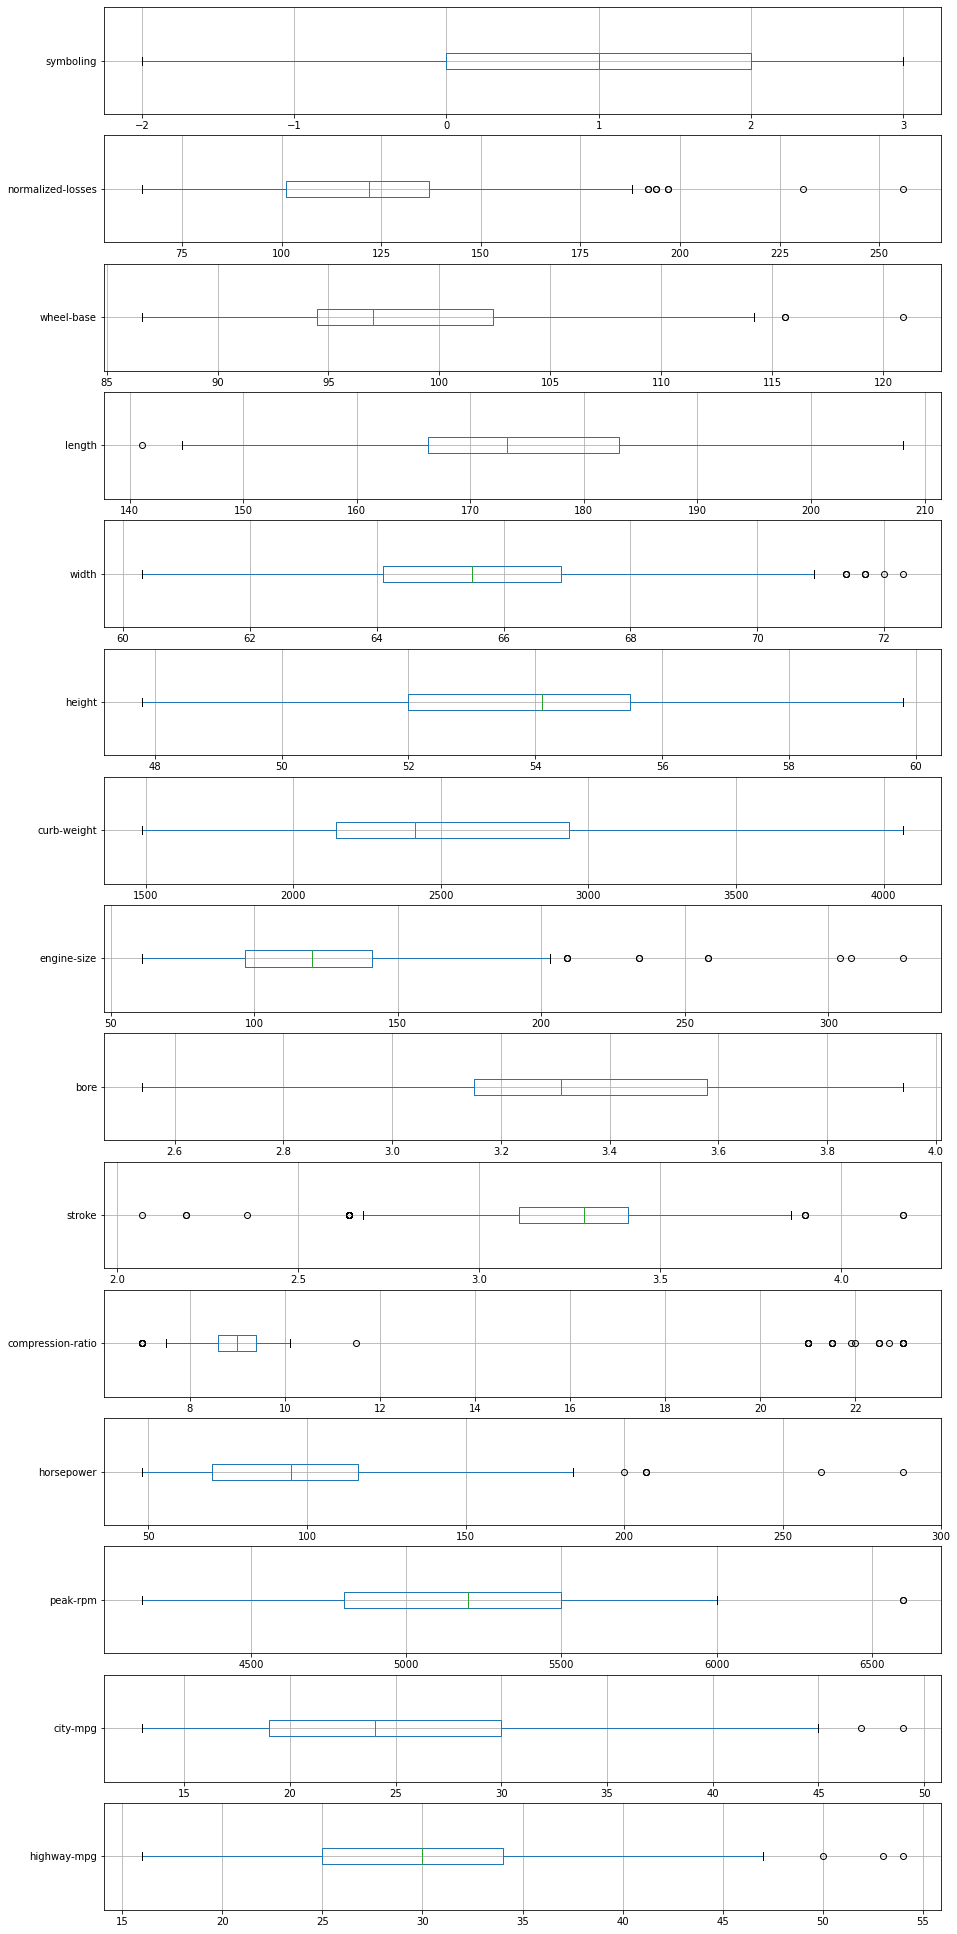

In [76]:
fig, axes = plt.subplots(15, 1, figsize=(15, 35))
for i, c in enumerate(num_cols):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)

# Bivariate Analysis

Pearson Correlation

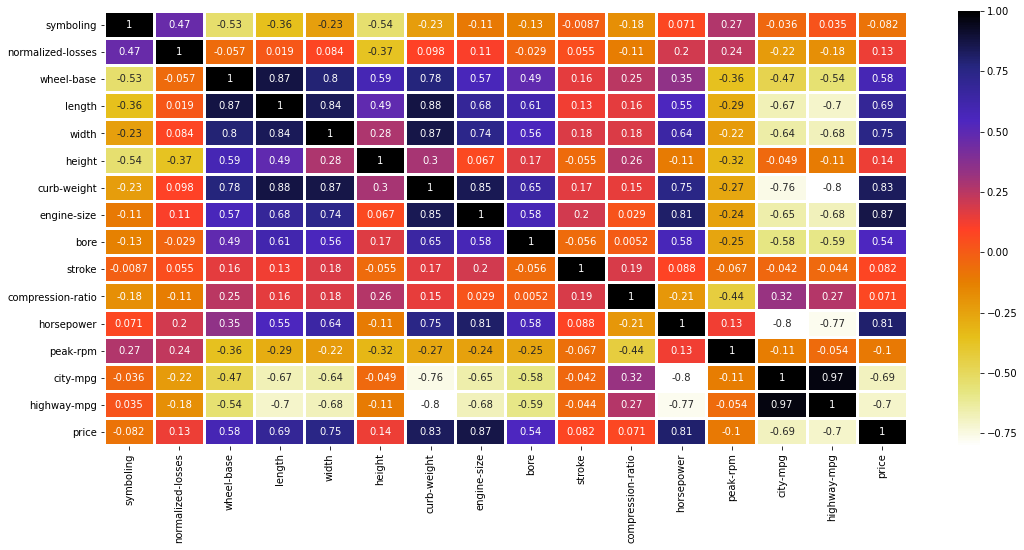

In [45]:
plt.figure(figsize=(18, 8))
sns.heatmap(train.corr(),annot=True,cmap=plt.cm.CMRmap_r,linewidths=2)

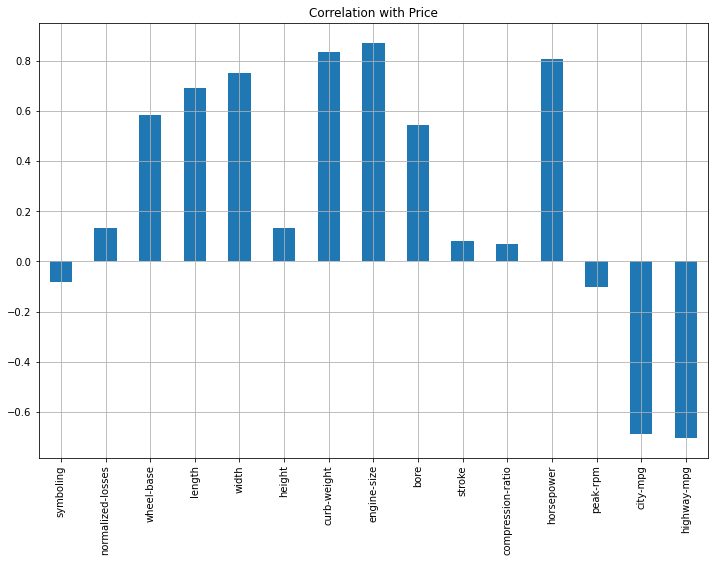

In [46]:
train.drop('price', axis=1).corrwith(train.price).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with Price")

As evident we have many features which are highly co related with the Price of car


# Categorical Variables

**Univariate Analysis**

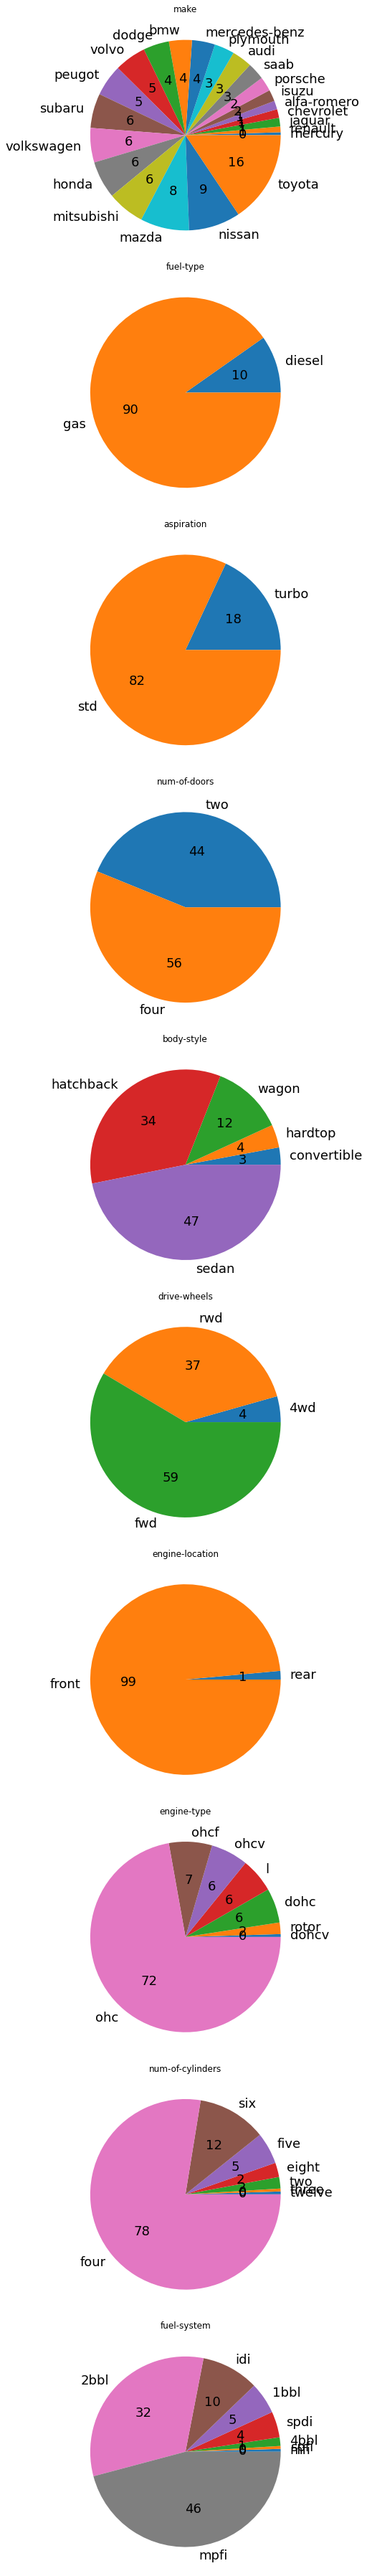

In [75]:
fig, axes = plt.subplots(10, 1, figsize=(40, 50))         #Rows , columns

for i, c in enumerate(cat_cols):
    _ = train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=18)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

### Observations
1. **Maximum # of cars were from make of toyota** (16%) followed by nissan and mazda
2. **90%**  of cars were of **gas** fuel type
3. Almost half of the cars were *sedan* (47%) followed by hatchback (34%)
4. Nearly half of the cars had 4 doors (56%) and nearly the other half were 2 doors (44%)
5. More than half of the cars were Forward Wheel Drive (~60%) followed by Rear Wheel Drive (37%)
6. Almost all the cars had **engine located at front** (**99%**)
7. **72%** of the engine types were OHC
7. **78%** of cars had **4 cylinder engines**

**Bivariate Anaysis**

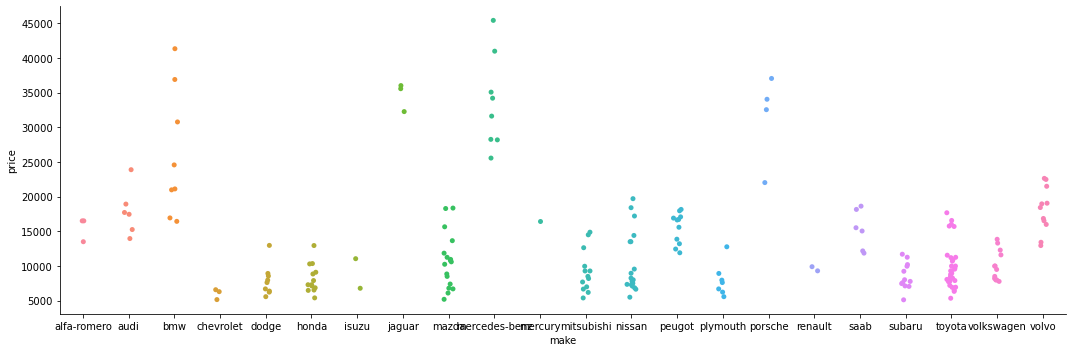

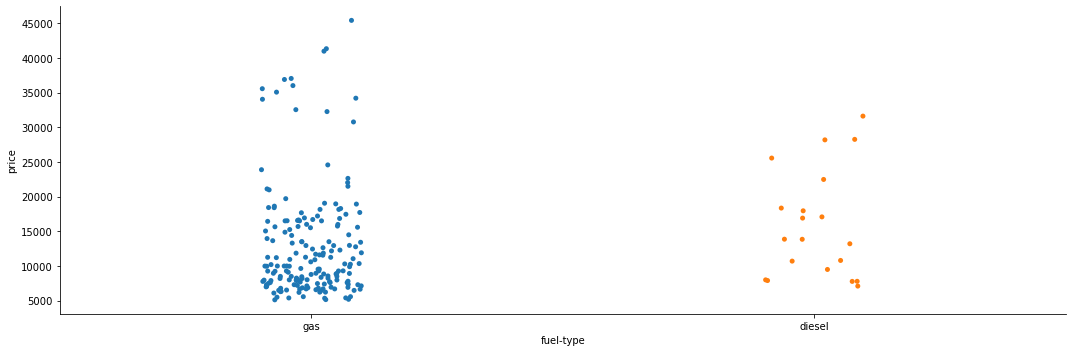

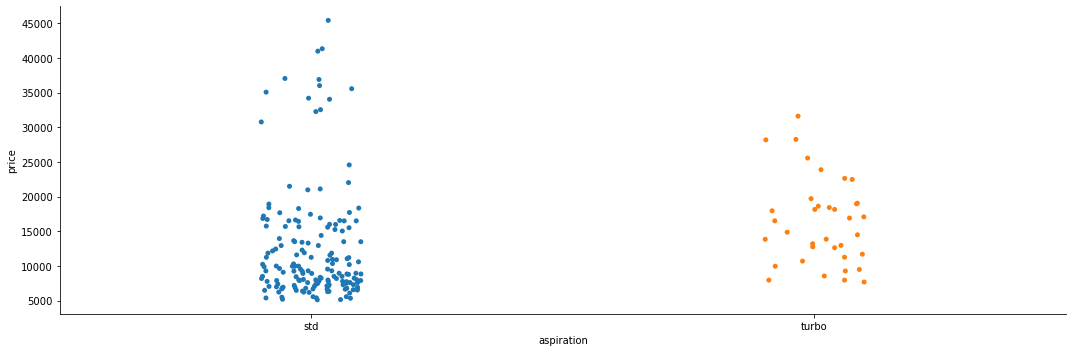

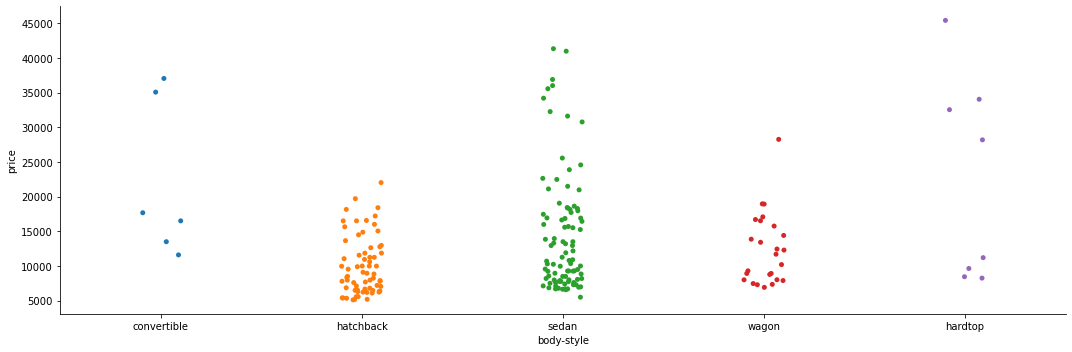

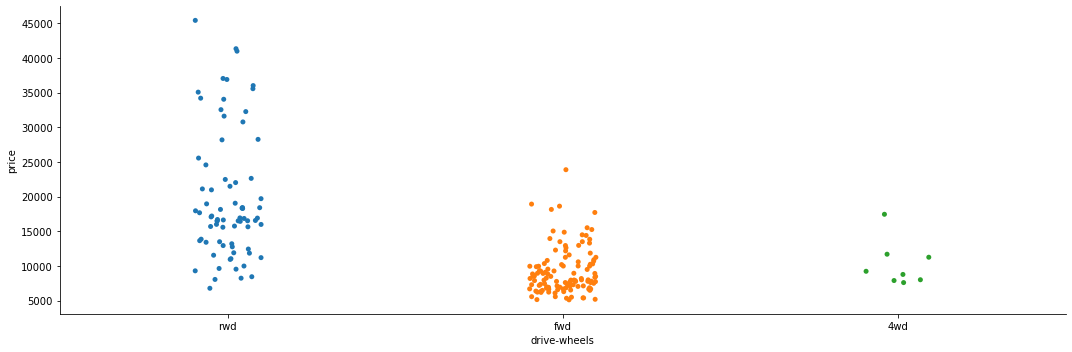

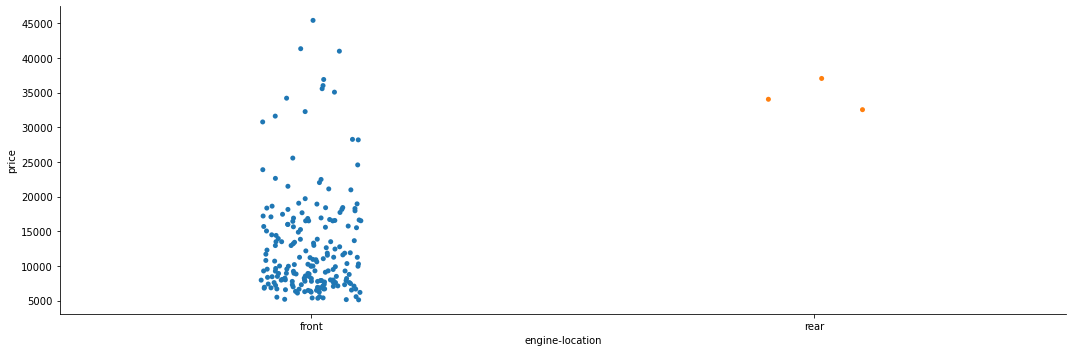

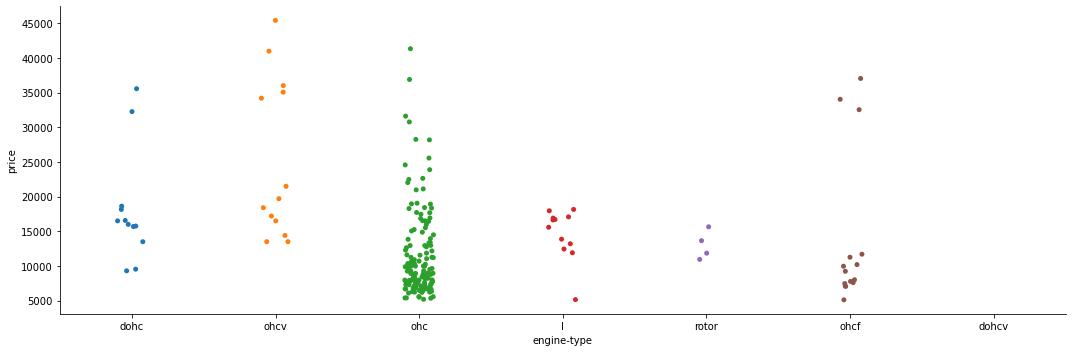

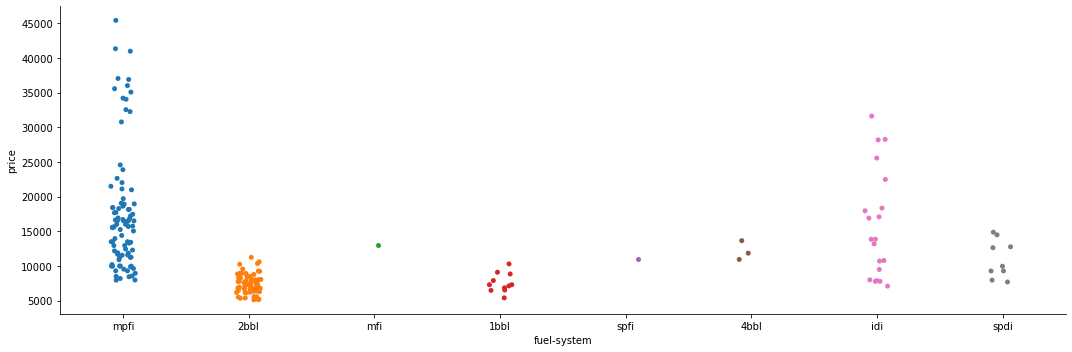

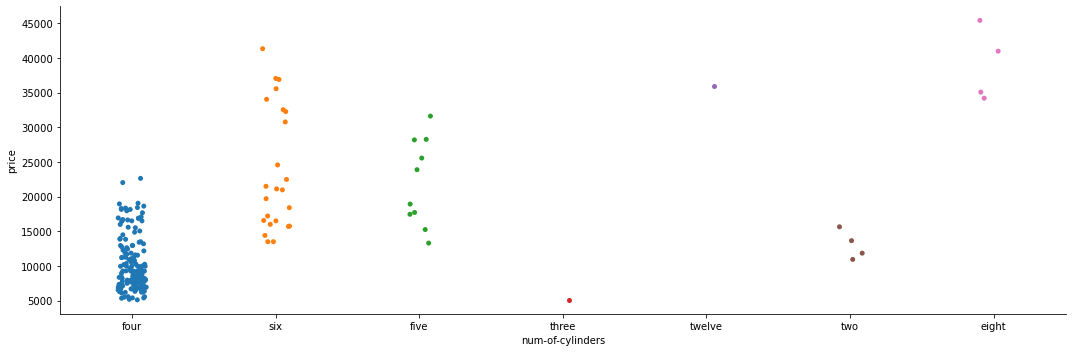

In [78]:
_ = sns.catplot(x="make", y="price", data=train, height=5, aspect=24/8)
_ = sns.catplot(x="fuel-type", y="price", data=train, height=5, aspect=24/8)
_ = sns.catplot(x="aspiration", y="price", data=train, height=5, aspect=24/8)
_ = sns.catplot(x="body-style", y="price", data=train, height=5, aspect=24/8)
_ = sns.catplot(x="drive-wheels", y="price", data=train, height=5, aspect=24/8)
_ = sns.catplot(x="engine-location", y="price", data=train, height=5, aspect=24/8)
_ = sns.catplot(x="engine-type", y="price", data=train, height=5, aspect=24/8)
_ = sns.catplot(x="fuel-system", y="price", data=train, height=5, aspect=24/8)
_ = sns.catplot(x="num-of-cylinders", y="price", data=train, height=5, aspect=24/8)

### Observations

1. **Mercedes**, **Jaguar**, **Porsche** were the most pricely cars among the lot and **chevrolet** was the cheapest
2. **Rear Wheel Drive** are more pricely compared to front wheel drive
3. 8 and 12 cylinder engines were more costly
4. Rear Wheel drive were more costly

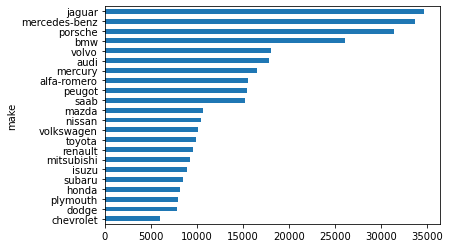

In [100]:
_ = train.groupby('make')['price'].mean().sort_values().plot(kind = 'barh')

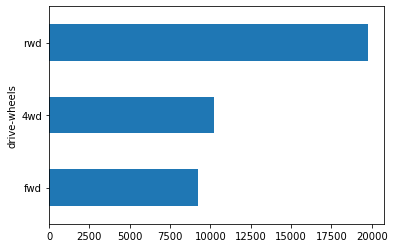

In [101]:
_ = train.groupby('drive-wheels')['price'].mean().sort_values().plot(kind = 'barh')

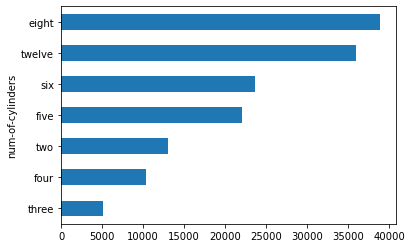

In [102]:
_ = train.groupby('num-of-cylinders')['price'].mean().sort_values().plot(kind = 'barh')

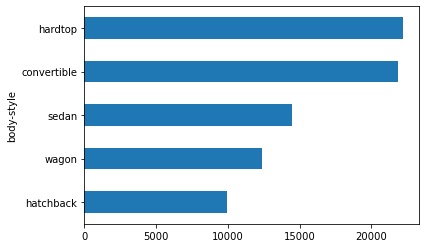

In [103]:
_ = train.groupby('body-style')['price'].mean().sort_values().plot(kind = 'barh')

# Categorizing Target (price)

In [148]:
binwidth = int((max(train['price'])-min(train['price']))/3)   #splitting range of data into equal size bins
binwidth

13427

In [149]:
bins= range(int(min(train['price'])),int(max(train['price'])),binwidth) #Building bin array from min to max value binwidth
bins

range(5118, 45400, 13427)

In [147]:
train['price category']= pd.cut(train ['price'], bins, labels= ["Low", "Medium", "H1gh"])

train

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price category
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,Low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,Low
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,Low
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,Low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,Low
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,Medium
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,Medium
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,Medium
